In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
%run -i ./ownlib/PHT-Library.ipynb

In [3]:
# Import images
ori_img = cv2.imread('./assets/lena.png', 0)
ori_logo = cv2.imread('./assets/squares.png', 0)

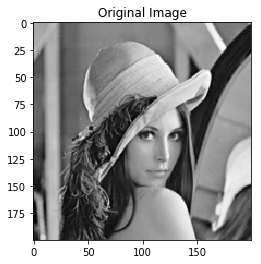

In [4]:
N = 200 # Image Size
P = 32 # Watermark Size

T_STEP = int(P / 4) + 1
I_STEP = int(N / 8) + 1

# Preprocess Image
IMG = cv2.resize(ori_img, (N, N))

# Show Image and Logo
imshow(IMG, 'Original Image')

Progress: [####################] 100.0%


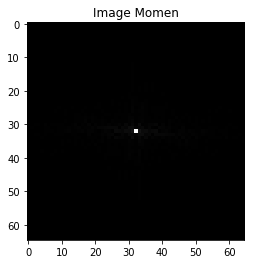

In [5]:
# Calculate Momen of Original Image
MOMEN = transformPHT(IMG, N, P)
imshow(MOMEN, 'Image Momen')

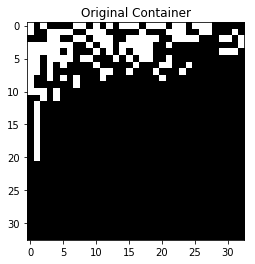

In [6]:
DELTA = 0.5 # Watermarking Power

P2 = P * 2 + 1

logo_position = np.index_exp[P:P2,P:P2]

# Current Binary Value
MAT_Q = np.floor(np.abs(MOMEN) / DELTA) % 2
CONTAINER = MAT_Q[logo_position]

# Show Container
imshow(CONTAINER, 'Original Container')

Progress: [####################] 100.0%


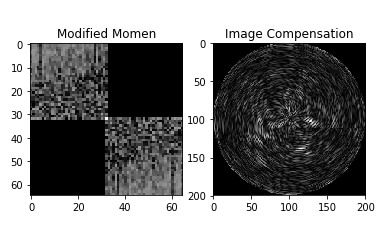

In [9]:
EPSILONE = np.ceil(np.abs(MOMEN) / DELTA) * DELTA - np.abs(MOMEN)
EPSILONE = EPSILONE - DELTA / 2
EPSILONE = EPSILONE / (np.abs(MOMEN) + 0.0000000000001) * MOMEN

EPSILONE_FILTER = np.zeros((P2, P2))
EPSILONE_FILTER[logo_position] = 1
EPSILONE_FILTER = EPSILONE_FILTER + np.rot90(np.rot90(EPSILONE_FILTER))

EPSILONE = EPSILONE * EPSILONE_FILTER

IMG_COMPENSATION = inversePHT(EPSILONE, N, P)

imshow2(EPSILONE, IMG_COMPENSATION, 'Modified Momen', 'Image Compensation')

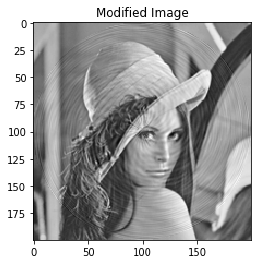

In [10]:
IMG2 = IMG + IMG_COMPENSATION

imshow(IMG2, "Modified Image")

In [11]:
def processAttack(IMG_MODIFIED, SIZE=N):
    
    # Calculate Momen
    MOMEN_MODIFIED = transformPHT(IMG_MODIFIED, SIZE, P)
    
    # Current Binary Value & Difference
    MAT_Q_MODIFIED = np.floor(np.abs(MOMEN_MODIFIED) / DELTA) % 2
    CONTAINER_MODIFIED = MAT_Q_MODIFIED[logo_position]
    C_DIFF = (CONTAINER != CONTAINER_MODIFIED) * 1
    
    # Calculate Bit Error Rate    
    BE = np.sum(C_DIFF)
    BER = BE / ((P + 1) * (P + 1))
    
    return (C_DIFF, BE, BER)

Progress: [####################] 100.0%


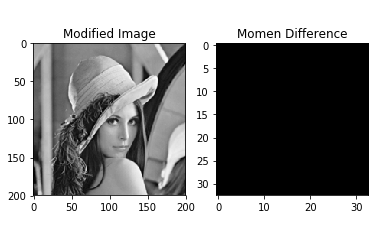

BE  :  0
BER :  0.00%


In [13]:
# Attack: No Attack

(C_DIFF_NA, BE_NA, BER_NA) = processAttack(IMG2)

# Show Container
imshow2(IMG, C_DIFF_NA, 'Modified Image', 'Momen Difference')

# Show Bit Error Rate
print('BE  : ', BE_NA)
print('BER : ', '{:.2%}'.format(BER_NA))

Progress: [####################] 100.0%


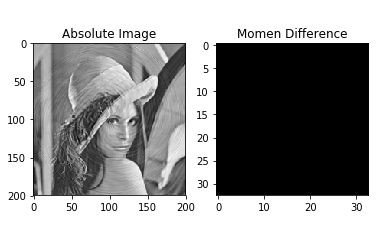

BE  :  0
BER :  0.00%


In [14]:
# Attack: Change Complex into Real Number
IMG_REAL = np.abs(IMG2)

(C_DIFF_REAL, BE_REAL, BER_REAL) = processAttack(IMG_REAL)

# Show Container
imshow2(IMG_REAL, C_DIFF_REAL, 'Absolute Image', 'Momen Difference')

# Show Bit Error Rate
print('BE  : ', BE_REAL)
print('BER : ', '{:.2%}'.format(BER_REAL))

Progress: [####################] 100.0%


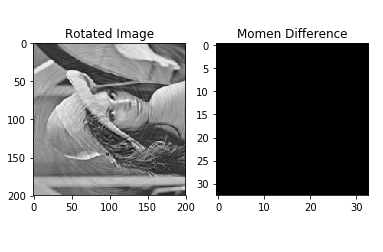

BE  :  0
BER :  0.00%


In [15]:
# Attack: Rotation 90 degree
IMG_ROTATE = np.rot90(IMG2)

(C_DIFF_ROTATE, BE_ROTATE, BER_ROTATE) = processAttack(IMG_ROTATE)

# Show Container
imshow2(IMG_ROTATE, C_DIFF_ROTATE, 'Rotated Image', 'Momen Difference')

# Show Bit Error Rate
print('BE  : ', BE_ROTATE)
print('BER : ', '{:.2%}'.format(BER_ROTATE))

Progress: [####################] 100.0%


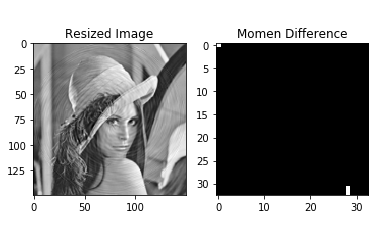

BE  :  3
BER :  0.28%


In [16]:
# Attack: Resize 75%
NN = 150
IMG_RESIZE = cv2.resize(np.abs(IMG2), (NN, NN))

(C_DIFF_RESIZE, BE_RESIZE, BER_RESIZE) = processAttack(IMG_RESIZE, NN)

# Show Container
imshow2(IMG_RESIZE, C_DIFF_RESIZE, 'Resized Image', 'Momen Difference')

# Show Bit Error Rate
print('BE  : ', BE_RESIZE)
print('BER : ', '{:.2%}'.format(BER_RESIZE))

Progress: [####################] 100.0%


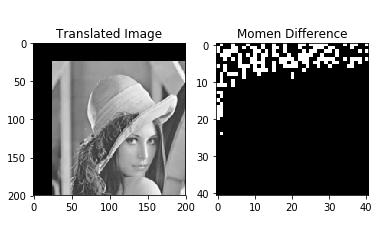

BE  :  165
BER :  9.82%


In [37]:
# Attack: Translation 12.5% X 12.5% Y

TRANSLATION_X = 25
TRANSLATION_Y = 25

IMG_TRANSLATION = np.zeros((N,N), dtype='complex128')
IMG_TRANSLATION[TRANSLATION_Y:N, TRANSLATION_X:N] = IMG2[0:N-TRANSLATION_Y, 0:N-TRANSLATION_X]

(C_DIFF_TRANSLATION, BE_TRANSLATION, BER_TRANSLATION) = processAttack(IMG_TRANSLATION)

# Show Container
imshow2(IMG_TRANSLATION, C_DIFF_TRANSLATION, 'Translated Image', 'Momen Difference')

# Show Bit Error Rate
print('BE  : ', BE_TRANSLATION)
print('BER : ', '{:.2%}'.format(BER_TRANSLATION))

Progress: [####################] 100.0%


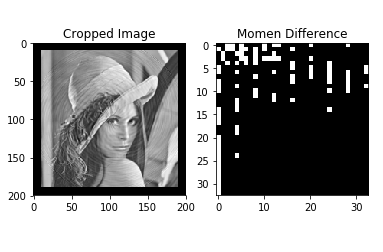

BE  :  93
BER :  8.54%


In [17]:
# Attack: FRAME 5%
CROP_WIDTH = 10

IMG_CROP = np.copy(IMG2)
IMG_CROP[0:CROP_WIDTH,:] = 0
IMG_CROP[:,0:CROP_WIDTH] = 0
IMG_CROP[N-CROP_WIDTH:N,:] = 0
IMG_CROP[:,N-CROP_WIDTH:N] = 0

(C_DIFF_CROP, BE_CROP, BER_CROP) = processAttack(IMG_CROP)

# Show Container
imshow2(IMG_CROP, C_DIFF_CROP, 'Cropped Image', 'Momen Difference')

# Show Bit Error Rate
print('BE  : ', BE_CROP)
print('BER : ', '{:.2%}'.format(BER_CROP))

Progress: [####################] 100.0%


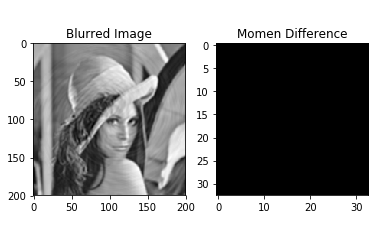

BE  :  0
BER :  0.00%


In [18]:
# Attack: BLUR 3x3
BLUR_KERNEL_SIZE = 3

IMG_BLUR = cv2.blur(np.abs(IMG2), (BLUR_KERNEL_SIZE, BLUR_KERNEL_SIZE))

(C_DIFF_BLUR, BE_BLUR, BER_BLUR) = processAttack(IMG_BLUR)

# Show Container
imshow2(IMG_BLUR, C_DIFF_BLUR, 'Blurred Image', 'Momen Difference')

# Show Bit Error Rate
print('BE  : ', BE_BLUR)
print('BER : ', '{:.2%}'.format(BER_BLUR))

Progress: [####################] 100.0%


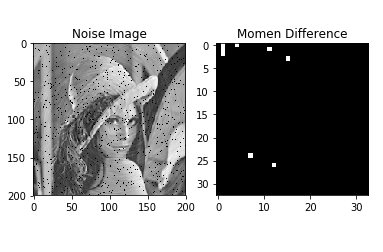

BE  :  8
BER :  0.73%


In [19]:
# Attack: RANDOM NOISE 3%
IMG_NOISE = np.copy(IMG2)

NOISE_PERCENTAGE = 3

for i, row in enumerate(IMG_NOISE):
    for j, val in enumerate(row):
        if(np.random.randint(low=0, high=100) < NOISE_PERCENTAGE):
            IMG_NOISE[i,j] = 0

(C_DIFF_NOISE, BE_NOISE, BER_NOISE) = processAttack(IMG_NOISE)

# Show Container
imshow2(IMG_NOISE, C_DIFF_NOISE, 'Noise Image', 'Momen Difference')

# Show Bit Error Rate
print('BE  : ', BE_NOISE)
print('BER : ', '{:.2%}'.format(BER_NOISE))